## **Preparación del conjunto de datos**


In [19]:
# Cargar librerías
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
path_data_cleaned_data = "../data/processed/cleaned_data.csv"

df = pd.read_csv(path_data_cleaned_data)

df

,brand,model,color,price_in_euro,power_kw,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,age
0,alfa-romeo,Alfa Romeo GTV,red,1300.0,148.0,Manual,Petrol,10.9,260.0,160500.0,28
1,alfa-romeo,Alfa Romeo Spider,black,4900.0,110.0,Manual,Petrol,9.5,225.0,189500.0,28
2,alfa-romeo,Alfa Romeo Spider,red,7900.0,110.0,Manual,Petrol,9.5,225.0,47307.0,27
3,alfa-romeo,Alfa Romeo 145,red,3500.0,110.0,Manual,Petrol,8.8,210.0,230000.0,27
4,alfa-romeo,Alfa Romeo 164,black,5500.0,132.0,Manual,Petrol,13.4,320.0,168000.0,27
...,...,...,...,...,...,...,...,...,...,...,...
173760,volvo,Volvo XC60,silver,81350.0,228.0,Automatic,Hybrid,7.4,167.0,60.0,0
173761,volvo,Volvo XC60,silver,55400.0,145.0,Automatic,Diesel,5.6,142.0,5000.0,0
173762,volvo,Volvo XC60,silver,54500.0,145.0,Automatic,Diesel,5.6,142.0,5900.0,0
173763,volvo,Volvo XC90,white,89690.0,173.0,Automatic,Diesel,7.6,202.0,4900.0,0


In [21]:
# Manejo de valores atípicos utilizando el método del IQR
q1 = df["price_in_euro"].quantile(0.25) # Primer cuartil
q3 = df["price_in_euro"].quantile(0.75) # Tercer cuartil
iqr = q3 - q1                           # Rango intercuartílico

lower_limit = max(0, q1 - 1.5 * iqr)
upper_limit = q3 + 1.5 * iqr

print(f"Rango de preciios aceptado: {lower_limit:.2f} a {upper_limit:.2f}")

# Filtrar el conjunto de datos del rango aceptado
df = df[(df["price_in_euro"] >= lower_limit) & (df["price_in_euro"] <= upper_limit)]

Rango de preciios aceptado: 0.00 a 55765.00


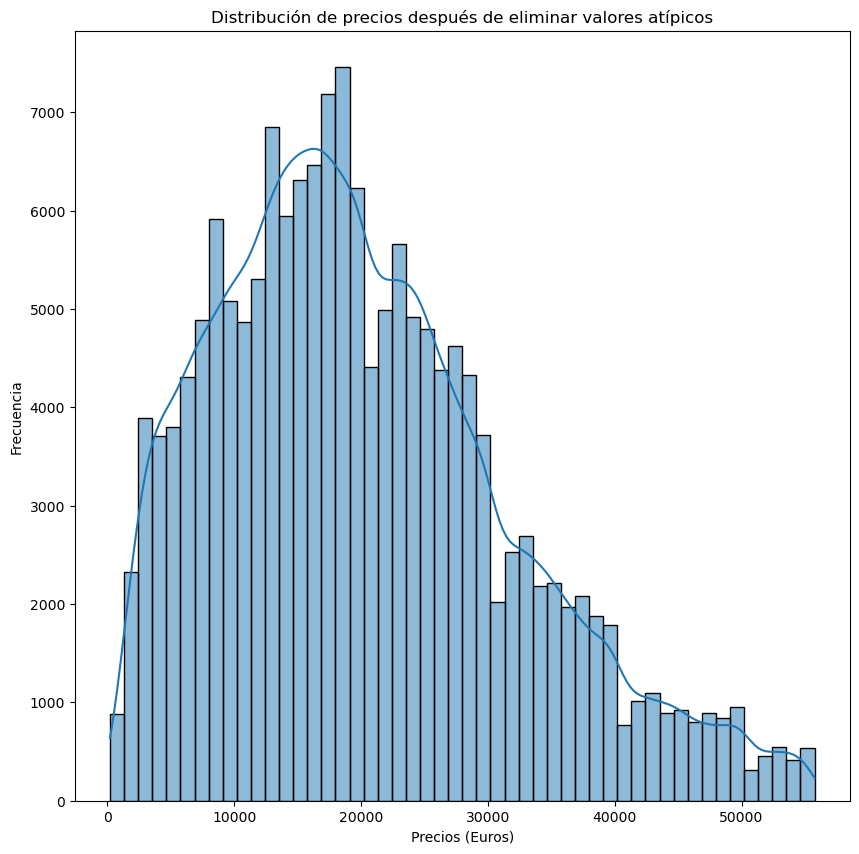

In [22]:
# Histograma después de eliminar valor atípicos
plt.figure(figsize=(10, 10))
sns.histplot(x =df["price_in_euro"], bins=50, kde=True)
plt.title("Distribución de precios después de eliminar valores atípicos")
plt.xlabel("Precios (Euros)")
plt.ylabel("Frecuencia")
plt.show()

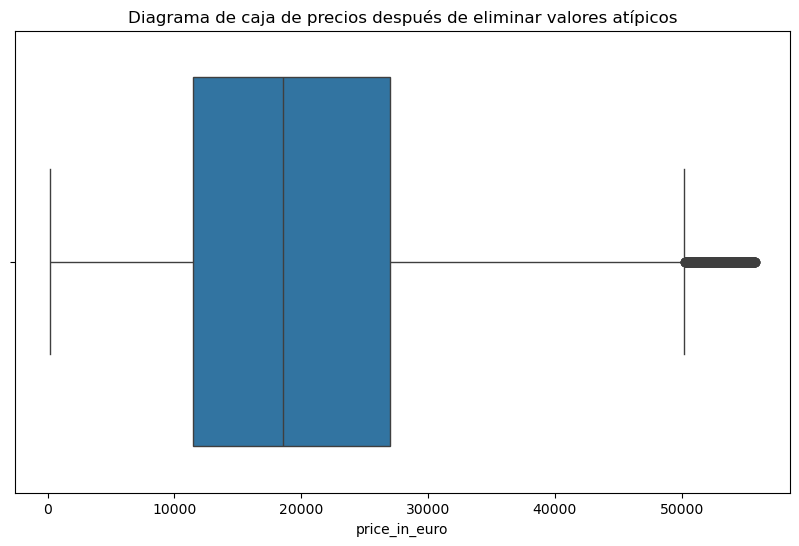

In [23]:
# Diagrama de caja después de eliminar valores atípicos
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["price_in_euro"])
plt.title("Diagrama de caja de precios después de eliminar valores atípicos")
plt.show()

In [24]:
# Eliminar columna redundante, pues fuel_consumption_l_100km ya nos da la información necesaria
df = df.drop(columns=["fuel_consumption_g_km"])

In [25]:
# Guardar el conjunto de datos modificado
path_no_outliers_data = "../data/processed/no_outliers_data.csv"
df.to_csv(path_no_outliers_data, index=False)
df

,brand,model,color,price_in_euro,power_kw,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km,age
0,alfa-romeo,Alfa Romeo GTV,red,1300.0,148.0,Manual,Petrol,10.9,160500.0,28
1,alfa-romeo,Alfa Romeo Spider,black,4900.0,110.0,Manual,Petrol,9.5,189500.0,28
2,alfa-romeo,Alfa Romeo Spider,red,7900.0,110.0,Manual,Petrol,9.5,47307.0,27
3,alfa-romeo,Alfa Romeo 145,red,3500.0,110.0,Manual,Petrol,8.8,230000.0,27
4,alfa-romeo,Alfa Romeo 164,black,5500.0,132.0,Manual,Petrol,13.4,168000.0,27
...,...,...,...,...,...,...,...,...,...,...
173751,volvo,Volvo V60,silver,50000.0,145.0,Automatic,Petrol,6.3,6047.0,0
173754,volvo,Volvo XC40,silver,37900.0,120.0,Automatic,Petrol,6.6,2145.0,0
173757,volvo,Volvo XC40,silver,37995.0,120.0,Automatic,Petrol,6.7,2100.0,0
173761,volvo,Volvo XC60,silver,55400.0,145.0,Automatic,Diesel,5.6,5000.0,0


In [26]:
# Cargar el archivo
path_no_outliers_data = "../data/processed/no_outliers_data.csv"
df = pd.read_csv(path_no_outliers_data)
df


,brand,model,color,price_in_euro,power_kw,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km,age
0,alfa-romeo,Alfa Romeo GTV,red,1300.0,148.0,Manual,Petrol,10.9,160500.0,28
1,alfa-romeo,Alfa Romeo Spider,black,4900.0,110.0,Manual,Petrol,9.5,189500.0,28
2,alfa-romeo,Alfa Romeo Spider,red,7900.0,110.0,Manual,Petrol,9.5,47307.0,27
3,alfa-romeo,Alfa Romeo 145,red,3500.0,110.0,Manual,Petrol,8.8,230000.0,27
4,alfa-romeo,Alfa Romeo 164,black,5500.0,132.0,Manual,Petrol,13.4,168000.0,27
...,...,...,...,...,...,...,...,...,...,...
163019,volvo,Volvo V60,silver,50000.0,145.0,Automatic,Petrol,6.3,6047.0,0
163020,volvo,Volvo XC40,silver,37900.0,120.0,Automatic,Petrol,6.6,2145.0,0
163021,volvo,Volvo XC40,silver,37995.0,120.0,Automatic,Petrol,6.7,2100.0,0
163022,volvo,Volvo XC60,silver,55400.0,145.0,Automatic,Diesel,5.6,5000.0,0


### Versión A: OneHot + Target Encondig (para regresión lineal y MLPs)

In [27]:
df_a = pd.read_csv(path_no_outliers_data)

X_a = df_a.drop(columns=["price_in_euro"])
y_a = df_a["price_in_euro"]

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, y_a, test_size=0.2, random_state=123)

X_train_a

,brand,model,color,power_kw,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km,age
87169,opel,Opel Combo,blue,64.0,Manual,Petrol,7.4,252000.0,21
51560,hyundai,Hyundai i30,white,85.0,Manual,Diesel,4.3,101000.0,4
30787,dacia,Dacia Duster,brown,74.0,Manual,LPG,5.5,38350.0,3
14265,audi,Audi Q2,black,81.0,Manual,Petrol,5.1,3000.0,0
119973,seat,SEAT Ibiza,blue,59.0,Manual,Petrol,5.5,10.0,0
...,...,...,...,...,...,...,...,...,...
146449,volkswagen,Volkswagen CC,black,118.0,Manual,Petrol,6.6,139500.0,10
119906,seat,SEAT Arona,blue,81.0,Automatic,Petrol,4.8,481.0,0
17730,bmw,BMW 328,blue,180.0,Automatic,Petrol,6.4,125000.0,12
28030,citroen,Citroen C5 Aircross,grey,96.0,Manual,Petrol,5.3,40016.0,4


In [28]:
# Target encoding
encoding_a = X_train_a.assign(price_in_euro=y_train_a).groupby("model")["price_in_euro"].mean()

X_train_a["model_encoded"] = X_train_a["model"].map(encoding_a)
X_test_a["model_encoded"] = X_test_a["model"].map(encoding_a)

global_mean_a = y_train_a.mean()
X_train_a["model_encoded"] = X_train_a["model_encoded"].fillna(global_mean_a)
X_test_a["model_encoded"] = X_test_a["model_encoded"].fillna(global_mean_a)

X_train_a = X_train_a.drop(columns=["model"])
X_test_a = X_test_a.drop(columns=["model"])

X_train_a

,brand,color,power_kw,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km,age,model_encoded
87169,opel,blue,64.0,Manual,Petrol,7.4,252000.0,21,15983.737968
51560,hyundai,white,85.0,Manual,Diesel,4.3,101000.0,4,18881.129528
30787,dacia,brown,74.0,Manual,LPG,5.5,38350.0,3,16738.628148
14265,audi,black,81.0,Manual,Petrol,5.1,3000.0,0,26485.118227
119973,seat,blue,59.0,Manual,Petrol,5.5,10.0,0,16146.520548
...,...,...,...,...,...,...,...,...,...
146449,volkswagen,black,118.0,Manual,Petrol,6.6,139500.0,10,14619.268293
119906,seat,blue,81.0,Automatic,Petrol,4.8,481.0,0,21799.771819
17730,bmw,blue,180.0,Automatic,Petrol,6.4,125000.0,12,15983.785714
28030,citroen,grey,96.0,Manual,Petrol,5.3,40016.0,4,26041.134783


In [29]:
# OneHot encondign para el resto de variables categóricas
categorical_cols_a = [
    "brand", "fuel_type", "color", "transmission_type"
]

X_train_a = pd.get_dummies(X_train_a, columns=categorical_cols_a, drop_first=True)
X_test_a = pd.get_dummies(X_test_a, columns=categorical_cols_a, drop_first=True)

# Alinear columnas
X_train_a, X_test_a = X_train_a.align(X_test_a, join="left", axis=1, fill_value=0)

# Guardar el orden de las columnas 
model_features = X_train_a.columns.tolist()

# Pasar de booleanos a 0/1
bool_cols = X_train_a.select_dtypes(include="bool").columns

X_train_a[bool_cols] = X_train_a[bool_cols].astype(int)
X_test_a[bool_cols] = X_test_a[bool_cols].astype(int)

X_train_a

,power_kw,fuel_consumption_l_100km,mileage_in_km,age,model_encoded,brand_aston-martin,brand_audi,brand_bentley,brand_bmw,brand_cadillac,...,color_grey,color_orange,color_red,color_silver,color_violet,color_white,color_yellow,transmission_type_Manual,transmission_type_Semi-automatic,transmission_type_Unknown
87169,64.0,7.4,252000.0,21,15983.737968,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
51560,85.0,4.3,101000.0,4,18881.129528,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
30787,74.0,5.5,38350.0,3,16738.628148,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14265,81.0,5.1,3000.0,0,26485.118227,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
119973,59.0,5.5,10.0,0,16146.520548,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146449,118.0,6.6,139500.0,10,14619.268293,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
119906,81.0,4.8,481.0,0,21799.771819,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17730,180.0,6.4,125000.0,12,15983.785714,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
28030,96.0,5.3,40016.0,4,26041.134783,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [30]:
# Variables de X a escalar
numerical_columns = [
    "power_kw", "fuel_consumption_l_100km", "mileage_in_km", "age", "model_encoded"
]

# Escalado de X
X_train_scaled = X_train_a.copy()
X_test_scaled = X_test_a.copy()

x_scaler = StandardScaler()
X_train_scaled[numerical_columns] = x_scaler.fit_transform(X_train_scaled[numerical_columns])
X_test_scaled[numerical_columns] = x_scaler.transform(X_test_scaled[numerical_columns])


# Escalado de y
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train_a.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test_a.values.reshape(-1, 1))

X_train_scaled

,power_kw,fuel_consumption_l_100km,mileage_in_km,age,model_encoded,brand_aston-martin,brand_audi,brand_bentley,brand_bmw,brand_cadillac,...,color_grey,color_orange,color_red,color_silver,color_violet,color_white,color_yellow,transmission_type_Manual,transmission_type_Semi-automatic,transmission_type_Unknown
87169,-0.994652,0.968527,2.161786,2.716017,-0.524074,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
51560,-0.576231,-0.937284,0.174281,-0.544385,-0.167822,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
30787,-0.795404,-0.199551,-0.650336,-0.736173,-0.431256,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14265,-0.655930,-0.445462,-1.115623,-1.311538,0.767134,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
119973,-1.094276,-0.199551,-1.154978,-1.311538,-0.504059,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146449,0.081289,0.476705,0.681029,0.606345,-0.691844,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
119906,-0.655930,-0.629895,-1.148779,-1.311538,0.191042,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17730,1.316629,0.353749,0.490176,0.989922,-0.524068,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
28030,-0.357057,-0.322506,-0.628408,-0.544385,0.712543,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


### Versión B: Target enconding (para decision tree, random forest, XGBoost y LightGBM)

In [31]:
df_b = pd.read_csv(path_no_outliers_data)

X_b = df.drop(columns=["price_in_euro"])
y_b = df["price_in_euro"]

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size=0.2, random_state=123)

X_train_b

,brand,model,color,power_kw,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km,age
87169,opel,Opel Combo,blue,64.0,Manual,Petrol,7.4,252000.0,21
51560,hyundai,Hyundai i30,white,85.0,Manual,Diesel,4.3,101000.0,4
30787,dacia,Dacia Duster,brown,74.0,Manual,LPG,5.5,38350.0,3
14265,audi,Audi Q2,black,81.0,Manual,Petrol,5.1,3000.0,0
119973,seat,SEAT Ibiza,blue,59.0,Manual,Petrol,5.5,10.0,0
...,...,...,...,...,...,...,...,...,...
146449,volkswagen,Volkswagen CC,black,118.0,Manual,Petrol,6.6,139500.0,10
119906,seat,SEAT Arona,blue,81.0,Automatic,Petrol,4.8,481.0,0
17730,bmw,BMW 328,blue,180.0,Automatic,Petrol,6.4,125000.0,12
28030,citroen,Citroen C5 Aircross,grey,96.0,Manual,Petrol,5.3,40016.0,4


In [32]:
# Target encoding
categorical_columns_b = [
    "model", "brand", "fuel_type", "color", "transmission_type"
]

global_mean_b = y_train_b.mean()

maps_encoding_b = {}
for col in categorical_columns_b:
    encoding_b = X_train_b.assign(price_in_euro=y_train_b).groupby(col)["price_in_euro"].mean()
    maps_encoding_b[col] = encoding_b.to_dict()
    
    # Mapear
    X_train_b[col + "_encoded"] = X_train_b[col].map(encoding_b)
    X_test_b[col + "_encoded"] = X_test_b[col].map(encoding_b)

    # Llenar nulos con la media global
    X_train_b[col + "_encoded"] = X_train_b[col + "_encoded"].fillna(global_mean_b)
    X_test_b[col + "_encoded"] = X_test_b[col + "_encoded"].fillna(global_mean_b)

X_train_b = X_train_b.drop(columns=categorical_columns_b)
X_test_b = X_test_b.drop(columns=categorical_columns_b)

X_train_b


,power_kw,fuel_consumption_l_100km,mileage_in_km,age,model_encoded,brand_encoded,fuel_type_encoded,color_encoded,transmission_type_encoded
87169,64.0,7.4,252000.0,21,15983.737968,14487.401518,18704.301672,19729.906599,14717.890571
51560,85.0,4.3,101000.0,4,18881.129528,19440.590775,21546.502118,21135.967172,14717.890571
30787,74.0,5.5,38350.0,3,16738.628148,14992.568004,14184.137476,20798.954620,14717.890571
14265,81.0,5.1,3000.0,0,26485.118227,23343.108698,18704.301672,19409.414681,14717.890571
119973,59.0,5.5,10.0,0,16146.520548,22099.730198,18704.301672,19729.906599,14717.890571
...,...,...,...,...,...,...,...,...,...
146449,118.0,6.6,139500.0,10,14619.268293,17087.258810,18704.301672,19409.414681,14717.890571
119906,81.0,4.8,481.0,0,21799.771819,22099.730198,18704.301672,19729.906599,26188.679224
17730,180.0,6.4,125000.0,12,15983.785714,20749.630459,18704.301672,19729.906599,26188.679224
28030,96.0,5.3,40016.0,4,26041.134783,17940.456587,18704.301672,21266.773589,14717.890571


### Versión C: Repetir versión B pero ahora aplicando Log a y

In [33]:
df_c = pd.read_csv(path_no_outliers_data)

X_c = df.drop(columns=["price_in_euro"])
y_c = df["price_in_euro"]

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.2, random_state=123)

X_train_c

,brand,model,color,power_kw,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km,age
87169,opel,Opel Combo,blue,64.0,Manual,Petrol,7.4,252000.0,21
51560,hyundai,Hyundai i30,white,85.0,Manual,Diesel,4.3,101000.0,4
30787,dacia,Dacia Duster,brown,74.0,Manual,LPG,5.5,38350.0,3
14265,audi,Audi Q2,black,81.0,Manual,Petrol,5.1,3000.0,0
119973,seat,SEAT Ibiza,blue,59.0,Manual,Petrol,5.5,10.0,0
...,...,...,...,...,...,...,...,...,...
146449,volkswagen,Volkswagen CC,black,118.0,Manual,Petrol,6.6,139500.0,10
119906,seat,SEAT Arona,blue,81.0,Automatic,Petrol,4.8,481.0,0
17730,bmw,BMW 328,blue,180.0,Automatic,Petrol,6.4,125000.0,12
28030,citroen,Citroen C5 Aircross,grey,96.0,Manual,Petrol,5.3,40016.0,4


In [34]:
# Target encoding
categorical_columns_c = [
    "model", "brand", "fuel_type", "color", "transmission_type"
]
global_mean_c = y_train_c.mean()

maps_encoding_c = {}
for col in categorical_columns_c:
    encoding = X_train_c.assign(price_in_euro=y_train_c).groupby(col)["price_in_euro"].mean()
    maps_encoding_c[col] = encoding.to_dict()

    # Mapear
    X_train_c[col + "_encoded"] = X_train_c[col].map(encoding)
    X_test_c[col + "_encoded"] = X_test_c[col].map(encoding)

    # Llenar nulos con la media global
    X_train_c[col + "_encoded"] = X_train_c[col + "_encoded"].fillna(global_mean_c)
    X_test_c[col + "_encoded"] = X_test_c[col + "_encoded"].fillna(global_mean_c)
    
# Eliminar columnas que ya fueron codificadas
X_train_c = X_train_c.drop(columns=categorical_columns_c)
X_test_c = X_test_c.drop(columns=categorical_columns_c)

X_train_c

,power_kw,fuel_consumption_l_100km,mileage_in_km,age,model_encoded,brand_encoded,fuel_type_encoded,color_encoded,transmission_type_encoded
87169,64.0,7.4,252000.0,21,15983.737968,14487.401518,18704.301672,19729.906599,14717.890571
51560,85.0,4.3,101000.0,4,18881.129528,19440.590775,21546.502118,21135.967172,14717.890571
30787,74.0,5.5,38350.0,3,16738.628148,14992.568004,14184.137476,20798.954620,14717.890571
14265,81.0,5.1,3000.0,0,26485.118227,23343.108698,18704.301672,19409.414681,14717.890571
119973,59.0,5.5,10.0,0,16146.520548,22099.730198,18704.301672,19729.906599,14717.890571
...,...,...,...,...,...,...,...,...,...
146449,118.0,6.6,139500.0,10,14619.268293,17087.258810,18704.301672,19409.414681,14717.890571
119906,81.0,4.8,481.0,0,21799.771819,22099.730198,18704.301672,19729.906599,26188.679224
17730,180.0,6.4,125000.0,12,15983.785714,20749.630459,18704.301672,19729.906599,26188.679224
28030,96.0,5.3,40016.0,4,26041.134783,17940.456587,18704.301672,21266.773589,14717.890571


In [35]:
y_train_c

87169      4990.0
51560     14350.0
30787     17990.0
14265     28690.0
119973    15999.0
           ...   
146449    12490.0
119906    25950.0
17730     18990.0
28030     19880.0
15725      8990.0
Name: price_in_euro, Length: 130419, dtype: float64

In [36]:
# Escalado de y_train
y_train_c = np.log1p(y_train_c)
y_train_c

87169      8.515392
51560      9.571575
30787      9.797627
14265     10.264339
119973     9.680344
            ...    
146449     9.432764
119906    10.163965
17730      9.851720
28030      9.897520
15725      9.103979
Name: price_in_euro, Length: 130419, dtype: float64